In [110]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import words
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import ngrams
import operator
from collections import Counter


In [111]:
##parse url

response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_neural_network') 
html = response.read().decode('utf8') 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text() 

words=word_tokenize(text)


English Word without removing stopwords: 15870
Vocabulary without removing stopwords: [('the', 542), ('of', 444), ('and', 358), ('a', 323), ('to', 259), ('in', 199), ('neural', 160), ('is', 155), ('learning', 141), ('networks', 141), ('for', 131), ('with', 125), ('Neural', 123), ('on', 113), ('network', 108), ('that', 105), ('as', 104), ('by', 93), ('The', 90), ('j', 88)]


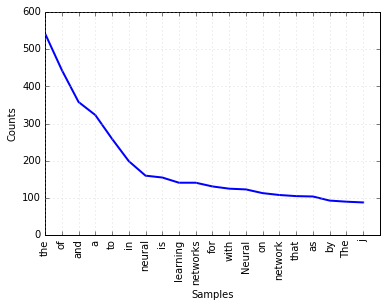

In [123]:

tokens = [t for t in words if t.isalpha()==True]
print("English Word without removing stopwords:",len(tokens))

freq = nltk.FreqDist(tokens) 
vocabulary_sorted= sorted(freq.items(), key=operator.itemgetter(1),reverse=True)

print("Vocabulary without removing stopwords:",vocabulary_sorted[:20])



freq.plot(20,cumulative=False)


English Word with removing stopwords: 11231
Vocabulary with removing stopwords: [('neural', 160), ('learning', 141), ('networks', 141), ('Neural', 123), ('network', 108), ('j', 88), ('Networks', 75), ('Learning', 68), ('function', 66), ('x', 65), ('edit', 65), ('Deep', 54), ('model', 50), ('computing', 49), ('deep', 46), ('f', 46), ('PDF', 45), ('input', 45), ('machine', 45), ('memory', 43)]


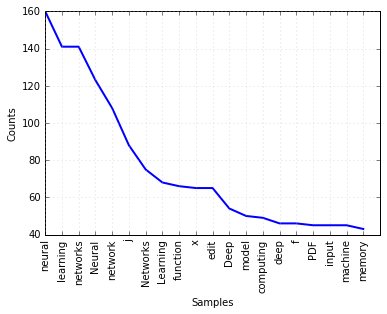

In [124]:
tokens = [t for t in words if t.isalpha()==True]

clean_tokens = tokens[:] 


for token in tokens: 
    if token.lower()  in stopwords.words('english'): 
        clean_tokens.remove(token) 
        
print("English Word with removing stopwords:",len(clean_tokens))

freq = nltk.FreqDist(clean_tokens)
vocabulary_sorted= sorted(freq.items(), key=operator.itemgetter(1),reverse=True)

print("Vocabulary with removing stopwords:",vocabulary_sorted[:20])

freq.plot(20,cumulative=False)


In [125]:
from nltk.tokenize import sent_tokenize 
print("sentence contained:",len(sent_tokenize(text)))


sentence contained: 1657


In [132]:
print("Lexical Diversity of Web Page with stopwords: {:.2f}".format(len(set(tokens))/float(len(tokens))))
print("Lexical Diversity of Web Page without stopwords: {:.2f}".format(len(set(clean_tokens))/float(len(clean_tokens))))

Lexical Diversity of Web Page with stopwords: 0.25
Lexical Diversity of Web Page without stopwords: 0.34


In [127]:
from nltk.probability import FreqDist


tags = nltk.pos_tag(clean_tokens)
frequencies = FreqDist([tag for (word, tag) in tags])

print("Top 5 parts of speech: {}".format( frequencies.most_common(5)))

Top 5 parts of speech: [('NNP', 4183), ('NN', 2650), ('JJ', 1308), ('NNS', 1020), ('VBG', 474)]


In [128]:
from nltk.util import ngrams

#unigrams = ngrams(clean_tokens,1)
#bigrams = ngrams(clean_tokens,2)

unigrams = nltk.FreqDist(clean_tokens)
bigrams   = nltk.FreqDist(nltk.bigrams(clean_tokens))

print("Top 10 most unigrams: ",Counter(unigrams).most_common(10))

Top 10 most unigrams:  [('neural', 160), ('learning', 141), ('networks', 141), ('Neural', 123), ('network', 108), ('j', 88), ('Networks', 75), ('Learning', 68), ('function', 66), ('x', 65)]


In [129]:

print("Top 10 most bigrams: ",Counter(bigrams).most_common(10))

Top 10 most bigrams:  [(('neural', 'networks'), 77), (('neural', 'network'), 56), (('Neural', 'Networks'), 55), (('j', 'j'), 36), (('Artificial', 'Neural'), 20), (('ready', 'ready'), 18), (('x', 'x'), 18), (('h', 'h'), 17), (('cost', 'function'), 17), (('artificial', 'neural'), 15)]


In [130]:
frequencies = FreqDist([tag for (word, tag) in tags if tag=='NN'])
print("Nouns in a page:",frequencies.most_common(1))

Nouns in a page: [('NN', 2650)]


In [131]:
import csv
with open('test.csv', 'w', encoding='utf-8-sig', newline='') as fp:
    writer = csv.writer(fp)
    writer.writerow(["Γιώργος","Τσιάτσιος","Μεταπτυχιακό στην Επιστήμη Δεδομένων"])